######Asmawati binti Selamat(2019180139)
######Siti Zuhairah binti Ramlan(2018629972)

**Customer Segmentation Activity (26 April 2020)**


---


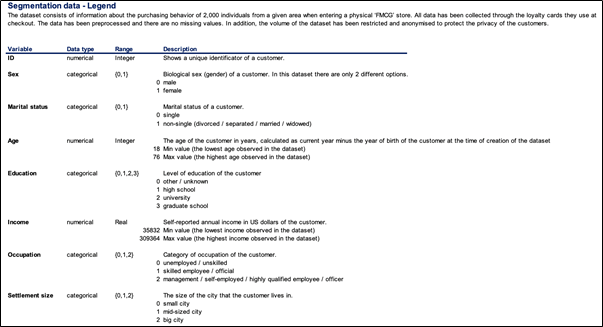



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Import Data into google colab**
######file customer_segmentation1.csv 

In [2]:
from pandas_datareader import data
from google.colab import files
uploaded = files.upload()

Saving segmentation_data1.csv to segmentation_data1.csv


######Print head to check nature of the data
######Data consist of total 8 attribute where 2 is continuous, 7 is categorical and 1 column for ID number
######Total of 2000 customer info


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['segmentation_data1.csv']))
print(df,sep=',')
df.head()

             ID     Sex  ...        Occupation  Settlement size
0     100000001    male  ...  skilled employee         big city
1     100000002  female  ...  skilled employee         big city
2     100000003    male  ...        unemployed       small city
3     100000004    male  ...  skilled employee   mid-sized city
4     100000005    male  ...  skilled employee   mid-sized city
...         ...     ...  ...               ...              ...
1995  100001996  female  ...        unemployed       small city
1996  100001997  female  ...  skilled employee       small city
1997  100001998    male  ...        unemployed       small city
1998  100001999  female  ...        unemployed       small city
1999  100002000    male  ...        unemployed       small city

[2000 rows x 8 columns]


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,male,single,67,university,124670,skilled employee,big city
1,100000002,female,non-single,22,high school,150773,skilled employee,big city
2,100000003,male,single,49,high school,89210,unemployed,small city
3,100000004,male,single,45,high school,171565,skilled employee,mid-sized city
4,100000005,male,single,53,high school,149031,skilled employee,mid-sized city


**Data Exploration**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               2000 non-null   int64 
 1   Sex              2000 non-null   object
 2   Marital status   2000 non-null   object
 3   Age              2000 non-null   int64 
 4   Education        2000 non-null   object
 5   Income           2000 non-null   int64 
 6   Occupation       2000 non-null   object
 7   Settlement size  2000 non-null   object
dtypes: int64(3), object(5)
memory usage: 125.1+ KB


No missing value detected in each of attribute

In [5]:
df.isna().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

**Data Visualization**


1.   Scatter plot to measure the relationship between 2 variables which is 'Age' and 'Income'
2.   Histogram to show the distribution attribute 'Age' and 'Income'




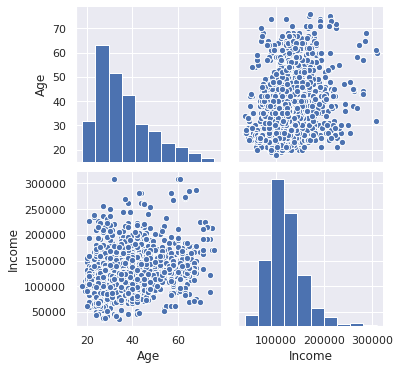

In [6]:
#scatter plot between variable with diagonal histogram

g = sns.PairGrid(df,vars=['Age', 'Income'])
g = g.map_diag(plt.hist, edgecolor='w')
g = g.map_offdiag(plt.scatter, edgecolor='w', s=40)




3.   Violin plot to show distribution of categorical which is in this graph to show distribution of 'Occupation' between male and female customer versus their'Income'. The highest would be from management/self-employed customer






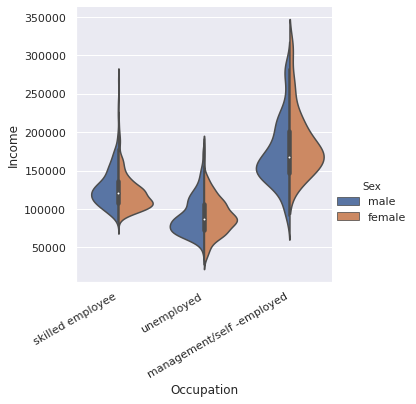

In [7]:
sns.set(style="darkgrid")
g = sns.catplot(x="Occupation", y="Income", kind="violin",hue="Sex", split=True, data=df)
g.fig.autofmt_xdate()



4.   For the barplot below, most of customer income from big city and mid city with estimated 'marital status' likely equal between single and non-single status


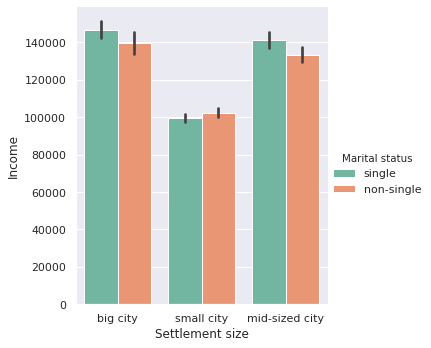

In [8]:
sns.catplot(x="Settlement size",y="Income",kind="bar",hue="Marital status", palette="Set2", data=df)



5.   Boxen plot also to show distribution, in this graph we examine the education level between male and female with their age attribute 




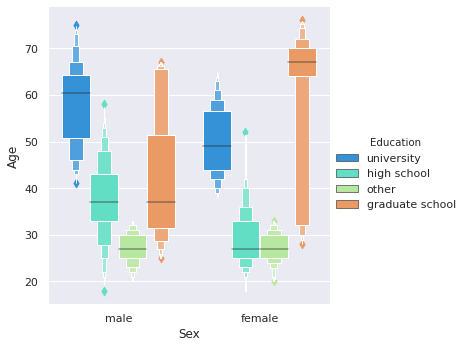

In [9]:
sns.catplot(x="Sex",y="Age",kind="boxen",hue="Education",palette="rainbow",data=df)



6.   For each settlement size, it will divide the 'Marital status' between male and female with their 'Income'. Suprisingly in the big city, no distribution of female single with income



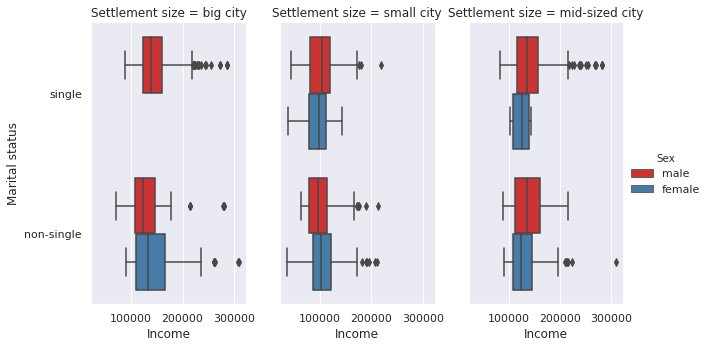

In [10]:
g = sns.catplot(x="Income", y="Marital status", hue="Sex",
            col="Settlement size", aspect=.6, palette="Set1",
            kind="box", data=df)

**Clustering**
######for this section, we will be using customer segmentation.csv file
######import csv file to the google colab

In [11]:
from pandas_datareader import data
from google.colab import files
uploaded = files.upload()

Saving segmentation data.csv to segmentation data.csv


In [12]:
import io
data = pd.read_csv(io.BytesIO(uploaded['segmentation data.csv']))
print(data,sep=',')
data.head()

             ID  Sex  Marital status  ...  Income  Occupation  Settlement size
0     100000001    0               0  ...  124670           1                2
1     100000002    1               1  ...  150773           1                2
2     100000003    0               0  ...   89210           0                0
3     100000004    0               0  ...  171565           1                1
4     100000005    0               0  ...  149031           1                1
...         ...  ...             ...  ...     ...         ...              ...
1995  100001996    1               0  ...  123525           0                0
1996  100001997    1               1  ...  117744           1                0
1997  100001998    0               0  ...   86400           0                0
1998  100001999    1               1  ...   97968           0                0
1999  100002000    0               0  ...   68416           0                0

[2000 rows x 8 columns]


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [14]:
data.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [0]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data1, columns=data.columns)
data_scaled.head()

**Hierachical**
######Using the dendrogram to find the optimal number of clusters
######From dendogram we obtain 3 optimal cluster

In [24]:
data1 = data.drop(['ID'], axis=1)
data1.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


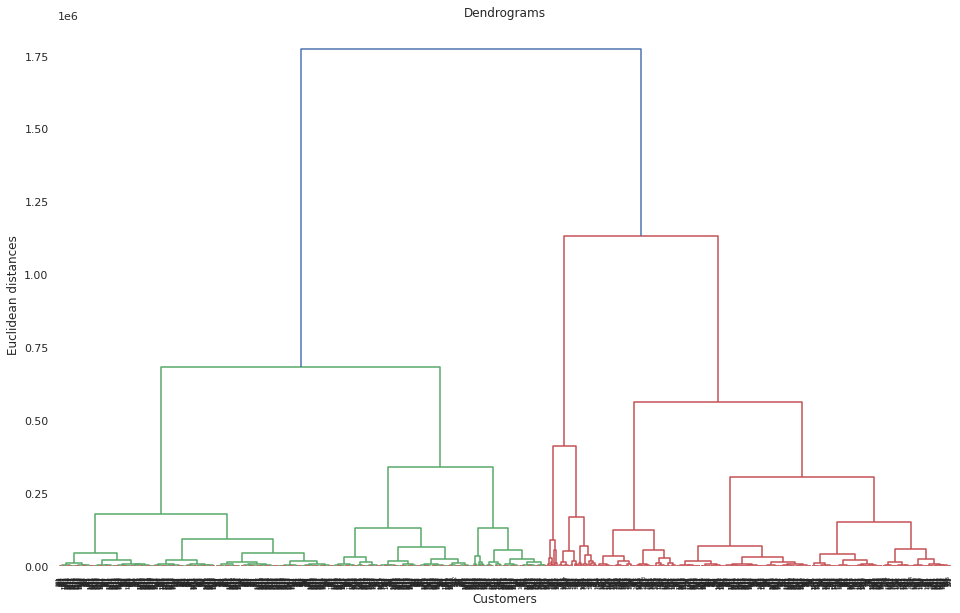

In [25]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16, 10))
plt.title('Dendrograms')  
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(data, method='ward'),leaf_rotation=90)
plt.axhline(y=1, color='r', linestyle='--')

**Training the Hierarchical Clustering model on the dataset**

In [0]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data1)

**K-Means**
######Using the elbow method to find the optimal number of clusters

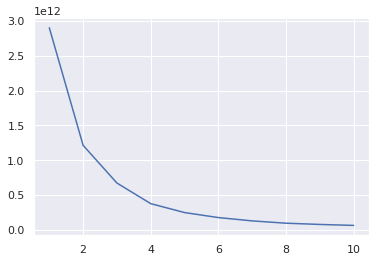

In [18]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
#plt.title('The Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
plt.show()

**Training the K-Means model on the dataset**

In [0]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data1)

**Standardization**

Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance)


In [0]:
from sklearn import preprocessing
standardized_df = preprocessing.scale(data)

**Visualising the clusters**

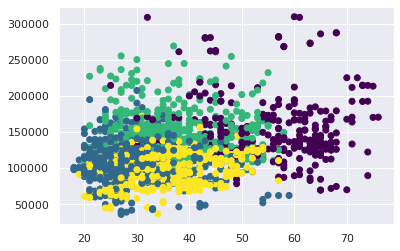

In [21]:
x=data
x_scaled=preprocessing.scale(x)
kmeans=KMeans(4)
kmeans.fit(x_scaled)
cluster_new=x.copy()
cluster_new['cluster_pred']=kmeans.fit_predict(x_scaled)
cluster_new
plt.scatter(cluster_new['Age'] ,cluster_new['Income'],c=cluster_new['cluster_pred'],cmap="viridis")
plt.legend
plt.show;